# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + "&q=" + city + '&units=' + 'metric' 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | bodo
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | long beach
Processing Record 6 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 1 | asadabad
Processing Record 8 of Set 1 | kamina
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | nemuro
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | tianchang
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | mangai
Processing Record 17 of Set 1 | sao tome
Processing Record 18 of Set 1 | afaahiti
Processing Record 19 of Set 1 | las tablas
Processing Record 20 of Set 1 | inhambane
Processing Record 21 of Set 1 | pont rouge
Processing Recor

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,8.74,69,96,1.34,AU,1698174292
1,bodo,67.2800,14.4050,3.02,77,0,8.23,NO,1698215882
2,adamstown,-25.0660,-130.1015,22.48,81,1,4.01,PN,1698155900
3,long beach,33.7670,-118.1892,19.93,88,100,1.54,US,1698156282
4,asadabad,34.7824,48.1185,14.97,55,34,2.38,IR,1698202868


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.74,69,96,1.34,AU,1698174292
1,bodo,67.2800,14.4050,3.02,77,0,8.23,NO,1698215882
2,adamstown,-25.0660,-130.1015,22.48,81,1,4.01,PN,1698155900
3,long beach,33.7670,-118.1892,19.93,88,100,1.54,US,1698156282
4,asadabad,34.7824,48.1185,14.97,55,34,2.38,IR,1698202868


In [29]:
from datetime import datetime
timestamp = 1698215882
datem = datetime.fromtimestamp(timestamp)

print(datem)

2023-10-25 00:38:02


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

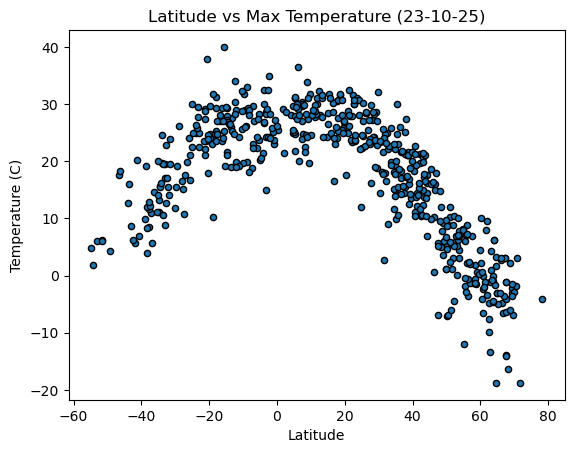

In [30]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp', marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (23-10-25)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

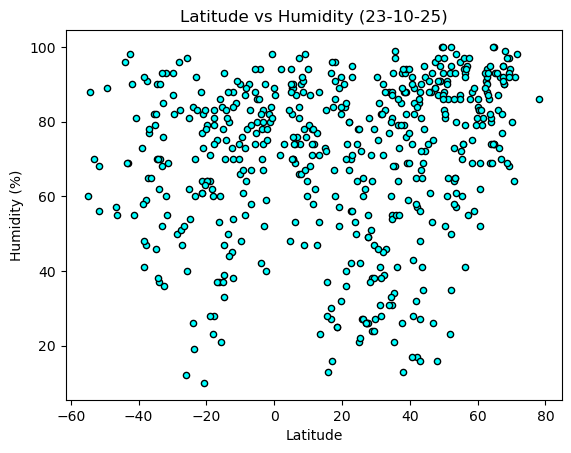

In [31]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', marker="o", color='cyan',edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (23-10-25)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

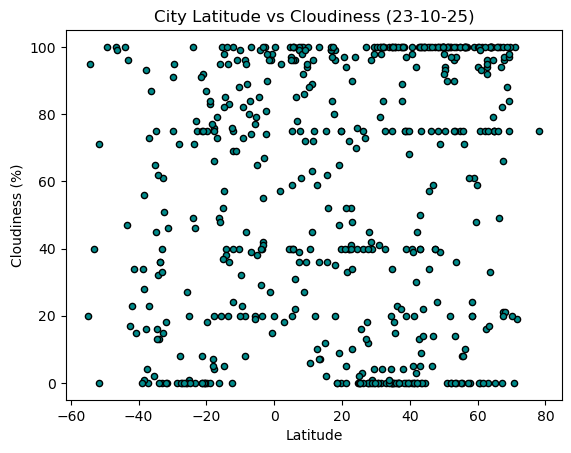

In [33]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', marker="o", color='darkcyan', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (23-10-25)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

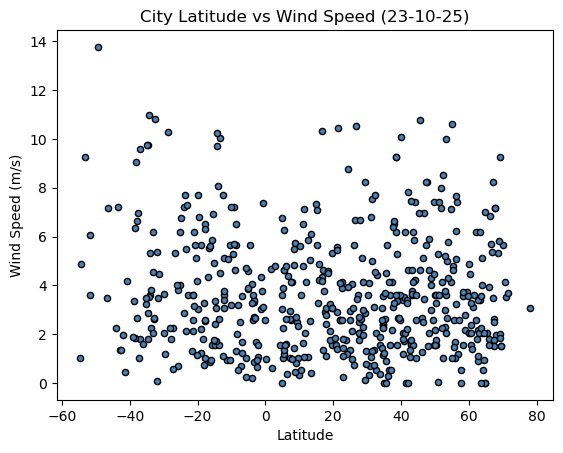

In [35]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', marker="o", color='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (23-10-25)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [150]:
# Define a function to create Linear Regression plots
def linear_reg_plot(col, hem):
    if hem =='northern':
        hemis_df = city_data_df[city_data_df['Lat']>= 0]
        hemi_title='Northern'
    if hem =='southern':
        hemis_df = city_data_df[city_data_df['Lat']< 0]
        hemi_title='Southern'

    (b1, b0, rval, pval, stder) = linregress(hemis_df['Lat'], hemis_df[col])
    model = f'y = {round(b1,2)}x + {round(b0,2)}'

    print(f'The linear model is {model}')
    print(f'The r-value is: {rval}')

    temps = hemis_df['Lat']*b1 + b0

    hemis_df.plot.scatter(x = 'Lat', y = col, marker="o", color='steelblue', edgecolors='black')
    plt.plot(hemis_df['Lat'], temps, color='r')
    plt.annotate(model, (125,165), xycoords='figure points',color='r' )
    plt.title(f"City Latitude vs {col} \n {hemi_title} Hemisphere (23-10-25)")
    plt.xlabel("Latitude")
    plt.ylabel(f'{col}')
    
    plt.show()

The linear model is y = -0.57x + 36.39
The r-value is: -0.8875856035302877


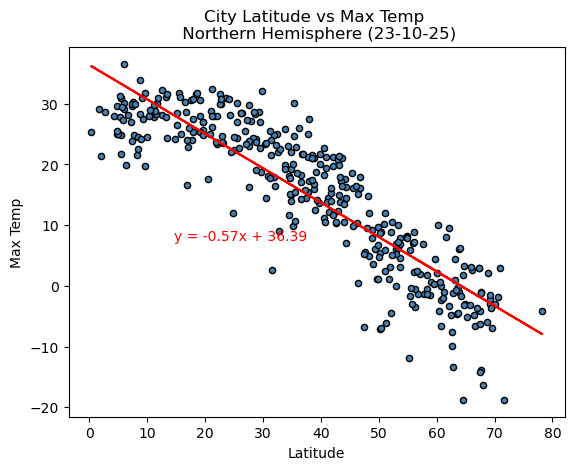

The linear model is y = 0.41x + 30.31
The r-value is: 0.7361313783497122


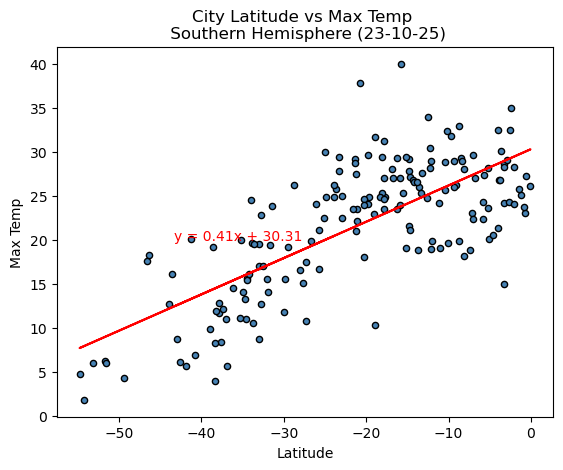

The linear model is y = 0.27x + 61.22
The r-value is: 0.2368429764595952


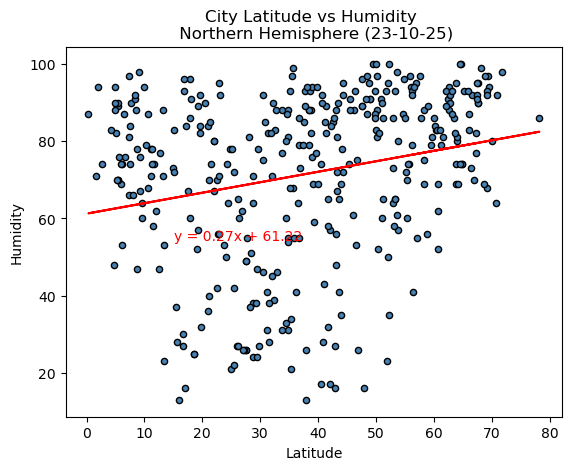

The linear model is y = 0.11x + 70.85
The r-value is: 0.07556009921420885


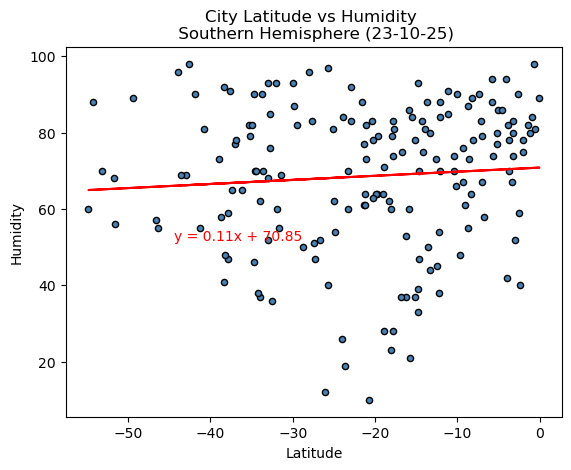

The linear model is y = 0.17x + 50.58
The r-value is: 0.0812669032318804


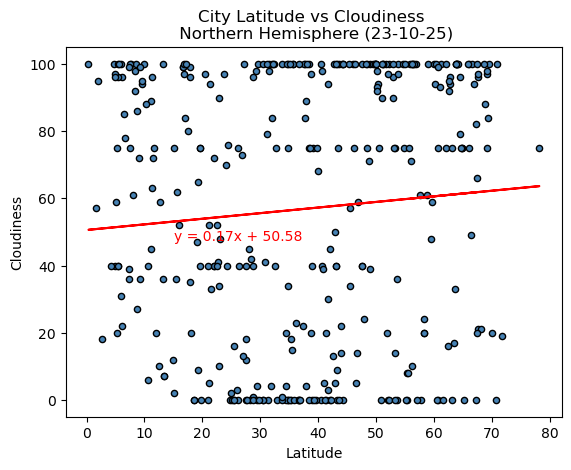

The linear model is y = 0.56x + 60.62
The r-value is: 0.21590354469962747


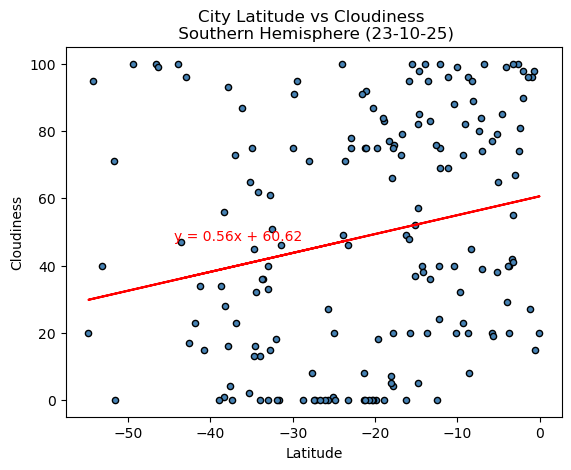

The linear model is y = 0.01x + 3.13
The r-value is: 0.06989845548529025


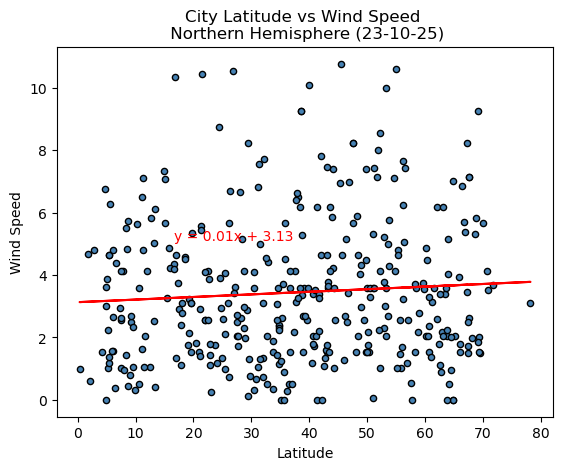

The linear model is y = -0.04x + 3.15
The r-value is: -0.19307668860386967


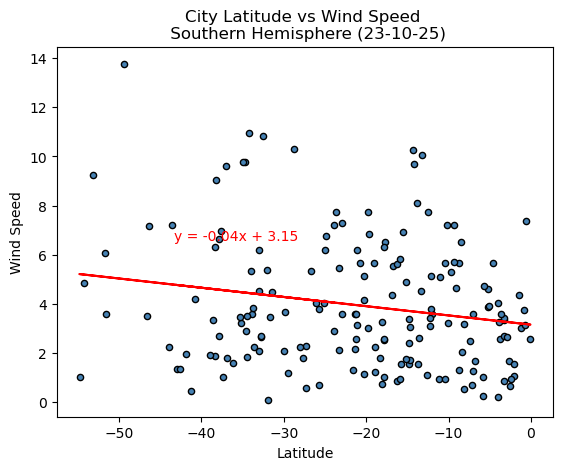

In [151]:
variables=['Max Temp','Humidity','Cloudiness','Wind Speed']
hemis=['northern','southern']

for col in variables:
    for hem in hemis:
        linear_reg_plot(col, hem)
        

In [148]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bodo,67.2800,14.4050,3.02,77,0,8.23,NO,1698215882
3,long beach,33.7670,-118.1892,19.93,88,100,1.54,US,1698156282
4,asadabad,34.7824,48.1185,14.97,55,34,2.38,IR,1698202868
6,isafjordur,66.0755,-23.1240,2.67,83,100,1.79,IS,1698224499
7,nemuro,43.3236,145.5750,13.80,81,9,3.78,JP,1698180158


In [149]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.74,69,96,1.34,AU,1698174292
2,adamstown,-25.0660,-130.1015,22.48,81,1,4.01,PN,1698155900
5,kamina,-8.7386,24.9906,19.86,87,96,1.30,CD,1698205988
9,waitangi,-43.9535,-176.5597,12.68,96,100,2.24,NZ,1698251843
10,port mathurin,-19.6833,63.4167,24.83,79,18,6.82,MU,1698196163


###  Temperature vs. Latitude Linear Regression Plot

The linear model is y = -0.57x + 36.39
The r-value is: -0.8875856035302877


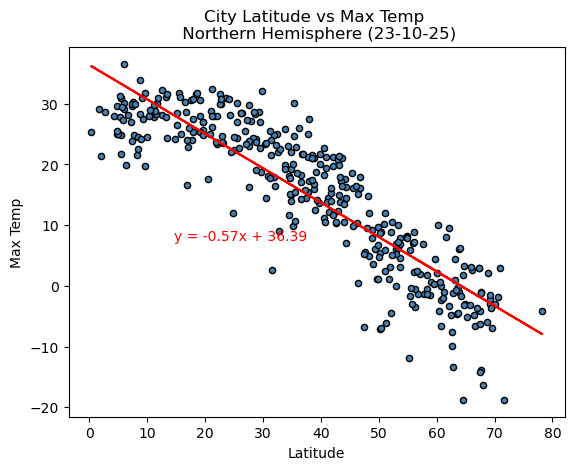

The linear model is y = 0.41x + 30.31
The r-value is: 0.7361313783497122


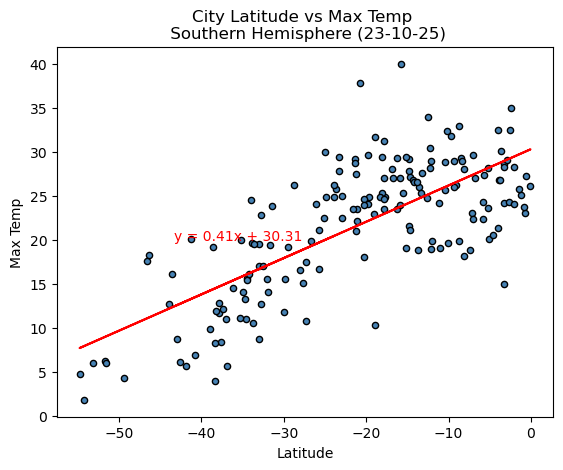

In [152]:
# Linear regression
for hem in hemis:
        linear_reg_plot('Max Temp', hem)


**Discussion about the linear relationship:** 

The correlation between the Max Temperature and the Latitude is fairly strong with r-values of -0.89 for the northern hemisphere and 0.74 for the southern one.

This result is as expected, because the further north (bigger latitude), the lower the temperture gets or for the southern hemisphere the more south the city is (lower latitude) the lower the temperture gets.

Finally the closeer to the ecuator (latitude = 0 ) the warmer the temperature gets, this is true for both hemispoheres.


### Humidity vs. Latitude Linear Regression Plot

The linear model is y = 0.27x + 61.22
The r-value is: 0.2368429764595952


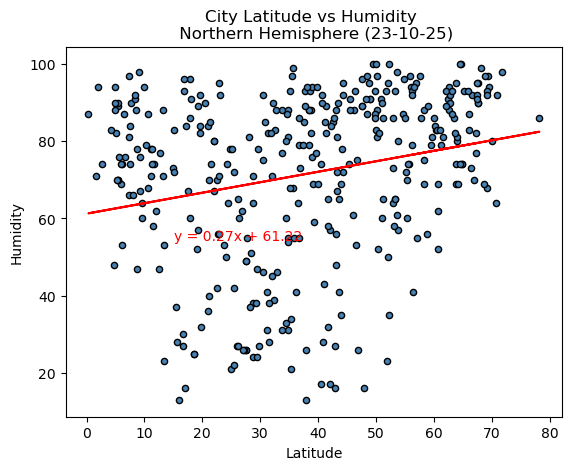

The linear model is y = 0.11x + 70.85
The r-value is: 0.07556009921420885


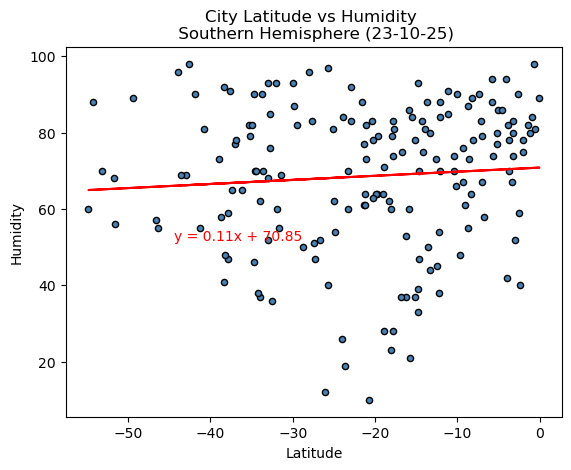

In [153]:
for hem in hemis:
        linear_reg_plot('Humidity', hem)

**Discussion about the linear relationship:**

The correlation between latitde and humidity is weak, this can be seen in the r-values and also in the distribution of the data.

We could conclude that the humidity is not dependant of the latitude in which a city is.

Probably analizing the same hour of the day for the different cities could lead to a better correlation.



### Cloudiness vs. Latitude Linear Regression Plot

The linear model is y = 0.17x + 50.58
The r-value is: 0.0812669032318804


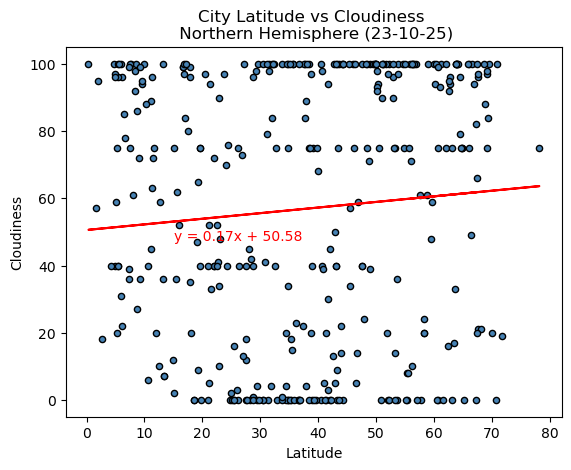

The linear model is y = 0.56x + 60.62
The r-value is: 0.21590354469962747


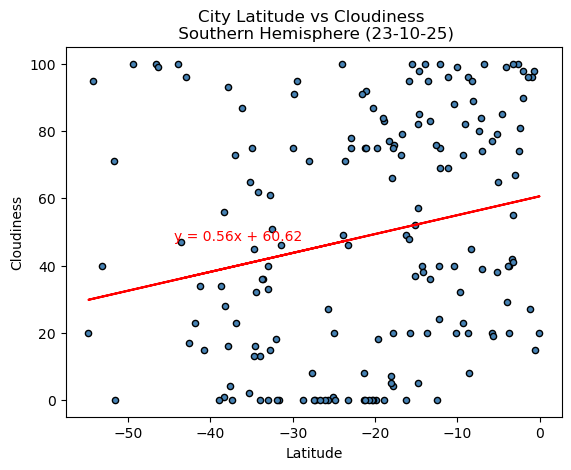

In [154]:
for hem in hemis:
        linear_reg_plot('Cloudiness', hem)

**Discussion about the linear relationship:** 

There appers to be no correlation between the cloudinees and the latitude of the cities, this can be seen in the r values for the regression model, in the southern hemisphere the data seems a little skewed but not enough to conclude there is a correlation.

One thing worth mention is that as the data for the cloudiness is in percentage, we have values both in the 100% and in 0% but for several latitudes, creating kinda a straight horizontal line, which reinforces the hypotesis that there is no correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The linear model is y = 0.01x + 3.13
The r-value is: 0.06989845548529025


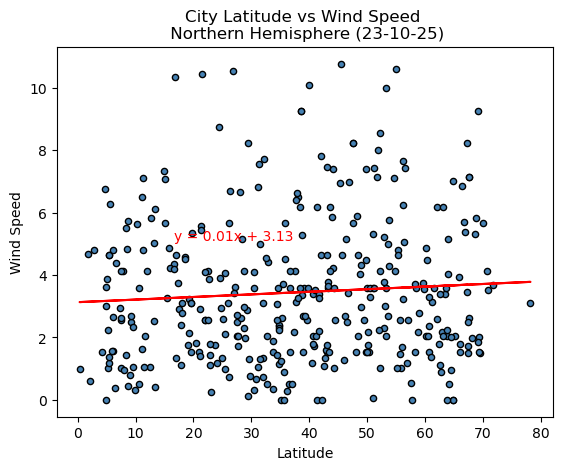

The linear model is y = -0.04x + 3.15
The r-value is: -0.19307668860386967


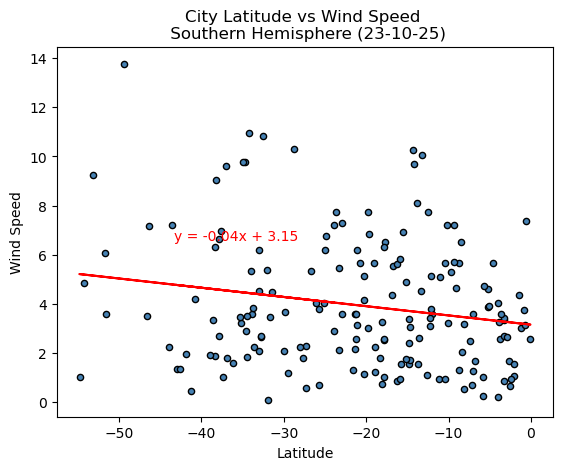

In [155]:
for hem in hemis:
        linear_reg_plot('Wind Speed', hem)

**Discussion about the linear relationship:** 

Also for the wind speed vs latitude it seems to be noi correlation whatsoever, but there seems to be a distribution along several latitudes with lower values of wind speed. It seems that there are more values below 4 m/s than above, but again this is true along several latituides so the hypotesis that there is a correlation between these variables is probably false.